In [1]:
bank = read.csv('datasets/UniversalBank.csv')
head(bank)

ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0


## Drop unwanted column

In [2]:
drops <- c("ID","ZIP.Code","Mortgage")
bank <- bank[ , !(names(bank) %in% drops)]

In [3]:
str(bank)

'data.frame':	5000 obs. of  11 variables:
 $ Age               : int  25 45 39 35 35 37 53 50 35 34 ...
 $ Experience        : int  1 19 15 9 8 13 27 24 10 9 ...
 $ Income            : int  49 34 11 100 45 29 72 22 81 180 ...
 $ Family            : int  4 3 1 1 4 4 2 1 3 1 ...
 $ CCAvg             : num  1.6 1.5 1 2.7 1 0.4 1.5 0.3 0.6 8.9 ...
 $ Education         : int  1 1 1 2 2 2 2 3 2 3 ...
 $ Personal.Loan     : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Securities.Account: int  1 1 0 0 0 0 0 0 0 0 ...
 $ CD.Account        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Online            : int  0 0 0 0 0 1 1 0 1 0 ...
 $ CreditCard        : int  0 0 0 0 1 0 0 1 0 0 ...


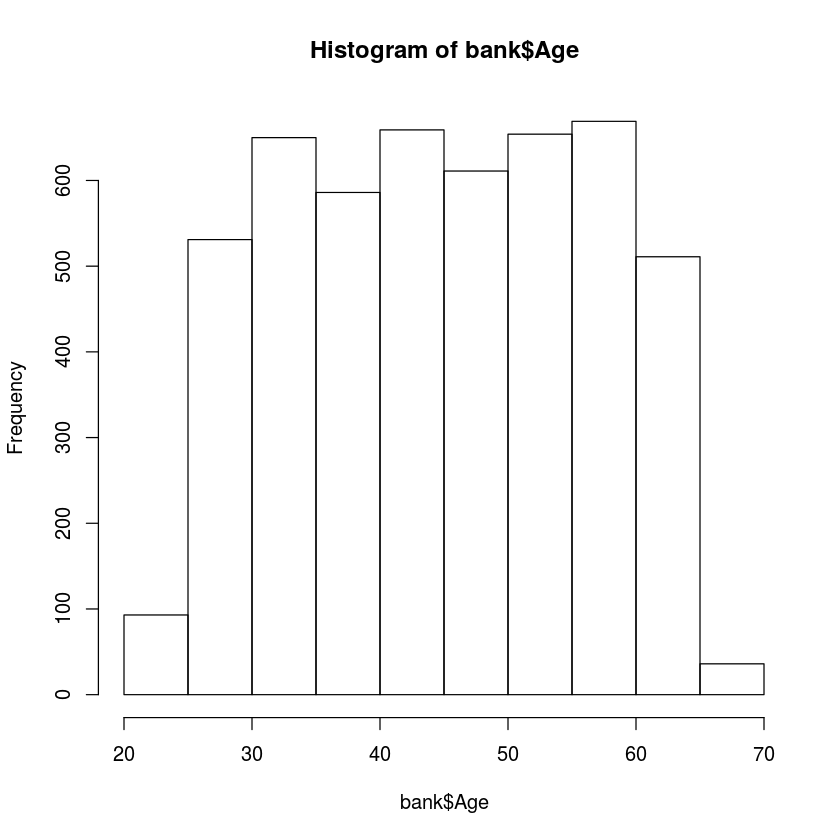

In [4]:
hist(bank$Age)

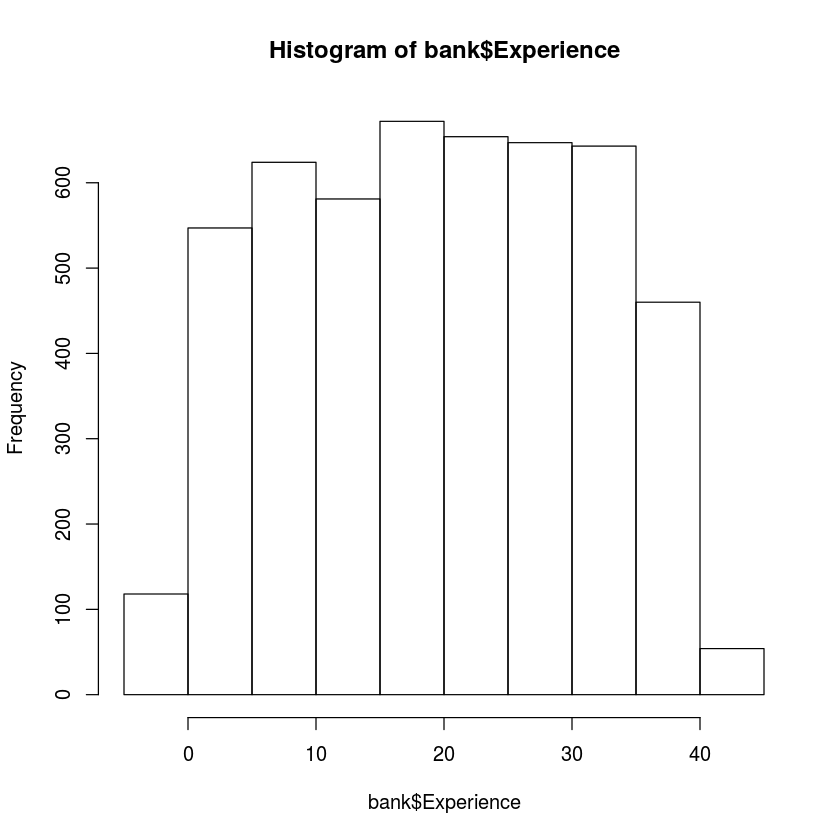

In [5]:
hist(bank$Experience)

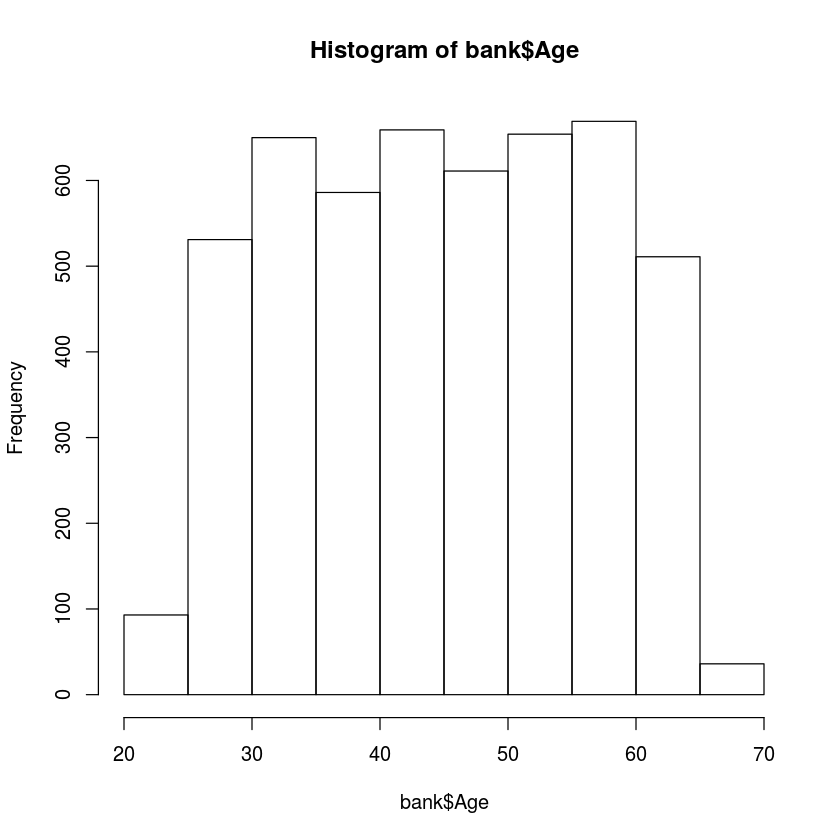

In [6]:
hist(bank$Age)


## Convert continous variables into categorical variables by forming bins

In [7]:
bank$Age2 = ifelse(bank$Age <=18, '<18', ifelse((bank$Age>18 & bank$Age <=30),'18_30',ifelse((bank$Age>30 & bank$Age <=40),'30_40',ifelse((bank$Age>40 & bank$Age <=50),'40_50',ifelse((bank$Age>50 & bank$Age <=60),'50_60','>60')))))

In [8]:
table(bank$Age2)


  >60 18_30 30_40 40_50 50_60 
  547   624  1236  1270  1323 

In [9]:
bank$Experience2 = ifelse(bank$Experience <=1, '<1', ifelse((bank$Experience>1 & bank$Experience <=5),'1_5',ifelse((bank$Experience>5 & bank$Experience <=10),'5_10',ifelse((bank$Experience>10 & bank$Age <=15),'10_15',ifelse((bank$Experience>15 & bank$Experience <=20),'15_20',ifelse((bank$Experience>20 & bank$Experience <=30),'20_30','>30'))))))

In [10]:
table(bank$Experience2)


   <1   >30   1_5 15_20 20_30  5_10 
  192  1738   473   672  1301   624 

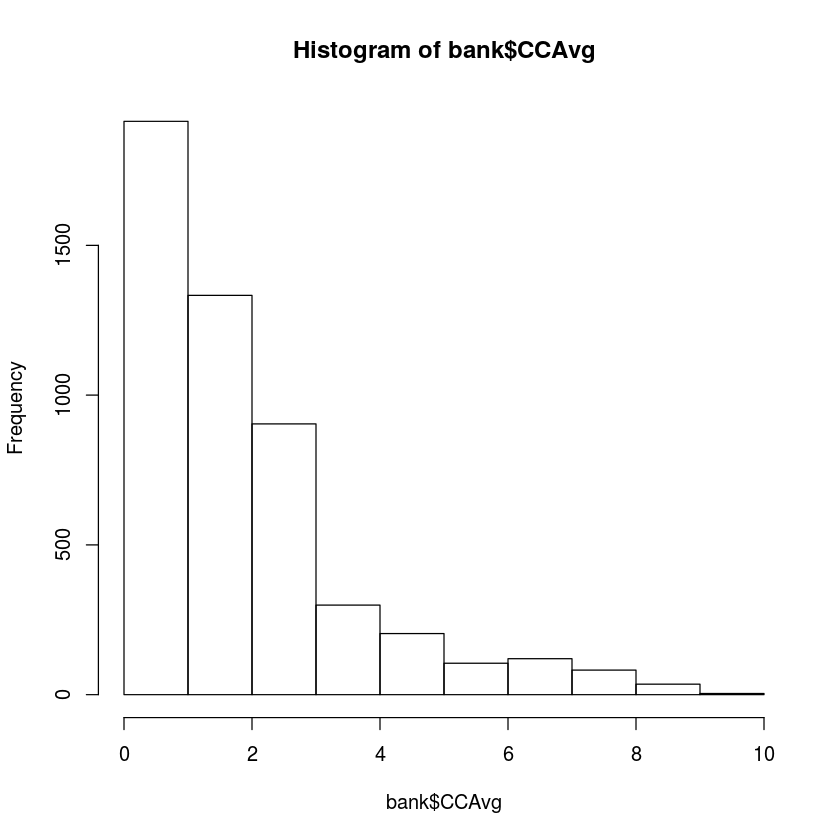

In [11]:
hist(bank$CCAvg)

In [12]:
bank$CCAvg2 = ifelse(bank$CCAvg <=1, '<1', ifelse((bank$CCAvg>1 & bank$CCAvg <=2),'1_2',ifelse((bank$CCAvg>2 & bank$CCAvg <=3),'2_3',ifelse((bank$CCAvg>3 & bank$CCAvg <=4),'3_4',ifelse((bank$CCAvg>4 & bank$CCAvg <=6),'4_6',ifelse((bank$CCAvg>6 & bank$CCAvg <=10),'6_10','>10'))))))

In [13]:
table(bank$CCAvg2)


  <1  1_2  2_3  3_4  4_6 6_10 
1914 1333  904  299  309  241 

### We can use quantile to convert items into bins

In [14]:
quantile(bank$CCAvg,0.5)

50% 
1.5

In [15]:
bank$CCAvg2 = ifelse(bank$CCAvg <=quantile(bank$CCAvg,0.25),'Low',
                    ifelse(bank$CCAvg >=quantile(bank$CCAvg,0.75),'High', 'Med'
                   ))


In [16]:
table(bank$CCAvg2)


High  Low  Med 
1355 1381 2264 

In [17]:
quantile(bank$Income)

0%  25%  50%  75% 100% 
   8   39   64   98  224

In [18]:
bank$Income2 = ifelse(bank$Income <=quantile(bank$Income,0.25),'L',
                    ifelse(bank$Income>=quantile(bank$Income,0.75),'H', 'M'
                   ))


In [19]:
table(bank$Income2)


   H    L    M 
1274 1312 2414 

In [20]:
str(bank)

'data.frame':	5000 obs. of  15 variables:
 $ Age               : int  25 45 39 35 35 37 53 50 35 34 ...
 $ Experience        : int  1 19 15 9 8 13 27 24 10 9 ...
 $ Income            : int  49 34 11 100 45 29 72 22 81 180 ...
 $ Family            : int  4 3 1 1 4 4 2 1 3 1 ...
 $ CCAvg             : num  1.6 1.5 1 2.7 1 0.4 1.5 0.3 0.6 8.9 ...
 $ Education         : int  1 1 1 2 2 2 2 3 2 3 ...
 $ Personal.Loan     : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Securities.Account: int  1 1 0 0 0 0 0 0 0 0 ...
 $ CD.Account        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Online            : int  0 0 0 0 0 1 1 0 1 0 ...
 $ CreditCard        : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Age2              : chr  "18_30" "40_50" "30_40" "30_40" ...
 $ Experience2       : chr  "<1" "15_20" ">30" "5_10" ...
 $ CCAvg2            : chr  "Med" "Med" "Med" "High" ...
 $ Income2           : chr  "M" "L" "L" "H" ...


In [21]:
drops <- c("Income","Age","Experience","CCAvg")
bank <- bank[ , !(names(bank) %in% drops)]

In [22]:
str(bank)

'data.frame':	5000 obs. of  11 variables:
 $ Family            : int  4 3 1 1 4 4 2 1 3 1 ...
 $ Education         : int  1 1 1 2 2 2 2 3 2 3 ...
 $ Personal.Loan     : int  0 0 0 0 0 0 0 0 0 1 ...
 $ Securities.Account: int  1 1 0 0 0 0 0 0 0 0 ...
 $ CD.Account        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Online            : int  0 0 0 0 0 1 1 0 1 0 ...
 $ CreditCard        : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Age2              : chr  "18_30" "40_50" "30_40" "30_40" ...
 $ Experience2       : chr  "<1" "15_20" ">30" "5_10" ...
 $ CCAvg2            : chr  "Med" "Med" "Med" "High" ...
 $ Income2           : chr  "M" "L" "L" "H" ...


In [23]:
library(arules)


ERROR: Error in library(arules): there is no package called ‘arules’
